## ML Algorithms

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay ,accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.model_selection import cross_validate


%matplotlib inline
sns.set(rc={'figure.figsize': [10, 6]}, font_scale=1.3)


In [2]:
df= pd.read_csv('heart_disease.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Removing outliers of BMI

In [3]:
from datasist.structdata import detect_outliers
outliers_indices = detect_outliers(df, 0, ['BMI'])
len(outliers_indices)
df.drop(index = outliers_indices, inplace=True)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No


<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b> Encoding  </b></p>
</div>. 

In [4]:
mapping_Genhealth={'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}
mapping_AgeCategory ={'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6,
 '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or older': 12}
mapping_yes_no={'Yes':1,'No':0}

Yes_No_Columns=['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma','KidneyDisease', 'SkinCancer']
df['GenHealth']=df['GenHealth'].map(mapping_Genhealth)
df['AgeCategory']=df['AgeCategory'].map(mapping_AgeCategory)
df['HeartDisease']=df['HeartDisease'].map(mapping_yes_no)
df[Yes_No_Columns]=df[Yes_No_Columns].replace(mapping_yes_no)

In [5]:
cols =['Sex','Race', 'Diabetic']
df=pd.get_dummies(df,columns=cols,drop_first=True)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,PhysicalActivity,...,SkinCancer,Sex_Male,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,7,1,...,1,0,0,0,0,0,1,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,12,1,...,0,0,0,0,0,0,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,9,1,...,0,1,0,0,0,0,1,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,11,0,...,1,0,0,0,0,0,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,4,1,...,0,0,0,0,0,0,1,0,0,0


<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b> Under Sampling </b></p>
</div>. 

In [6]:
from imblearn.under_sampling import RandomUnderSampler

features = df.drop(columns =['HeartDisease'], axis = 1)
target = df['HeartDisease']

# setting up testing and training sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=27)

sm = RandomUnderSampler(random_state=27)
x_train, y_train = sm.fit_resample(x_train, y_train)

In [7]:
print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (41796, 23)
Shape of testing feature: (61880, 23)
Shape of training label: (41796,)
Shape of training label: (61880,)


<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b> Standrization </b></p>
</div>. 

In [8]:
from sklearn.preprocessing import StandardScaler 
Scaler = StandardScaler()
x_train = Scaler.fit_transform(x_train)
x_test = Scaler.fit_transform(x_test)
x_train

array([[ 1.28665058, -0.98155584, -0.24638283, ..., -0.1575235 ,
        -0.51486764, -0.07803893],
       [-0.03603857, -0.98155584, -0.24638283, ..., -0.1575235 ,
        -0.51486764, -0.07803893],
       [-1.48948066, -0.98155584, -0.24638283, ..., -0.1575235 ,
        -0.51486764, -0.07803893],
       ...,
       [ 1.49130735,  1.01879074, -0.24638283, ..., -0.1575235 ,
         1.94224675, -0.07803893],
       [-1.36062269, -0.98155584, -0.24638283, ..., -0.1575235 ,
        -0.51486764, -0.07803893],
       [ 0.11745401, -0.98155584, -0.24638283, ..., -0.1575235 ,
        -0.51486764, -0.07803893]])

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b> Separate Models  </b></p>
</div>. 

**Here I take different machine learning algorithm and try to find algorithm which predict accurately.**

1. Logistic Regression
2. K-Nearest Neighbour
3. Naive Bayes
4. Decision Tree
5. Random Forest Classifier
6. Extreme Gradient Boost



In [9]:


def evaluate_model(model,x):
    model=model
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall
    print(f'Training Accuracy: {model.score(x_train, y_train)}')
    print('_'*50)
    print('Accuracy Score: ', accuracy_score(y_test, y_pred))
    print('_'*50)
    print('Precision Score: ', precision_score(y_test, y_pred))
    print('_'*50)
    print('Recall Score: ', recall_score(y_test, y_pred))
    print('_'*50)
    print(classification_report(y_test,y_pred))
    print('_'*50)
    print('F1 Score: ',f1_score(y_test,y_pred))
    
    # Display confussion matrix
    plt.figure(figsize = (6,5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True,cmap=x, fmt = '.1f') # plot_kwargs = {'percent' : True}
    plt.xlabel('Predicted')
    plt.ylabel('True')

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> 1. Logestic Regression  </b></p>
</div>. 

Training Accuracy: 0.7664848310843143
__________________________________________________
Accuracy Score:  0.5978506787330317
__________________________________________________
Precision Score:  0.16476747767169694
__________________________________________________
Recall Score:  0.9098639455782312
__________________________________________________
              precision    recall  f1-score   support

           0       0.99      0.57      0.72     56588
           1       0.16      0.91      0.28      5292

    accuracy                           0.60     61880
   macro avg       0.58      0.74      0.50     61880
weighted avg       0.92      0.60      0.68     61880

__________________________________________________
F1 Score:  0.2790091264667536


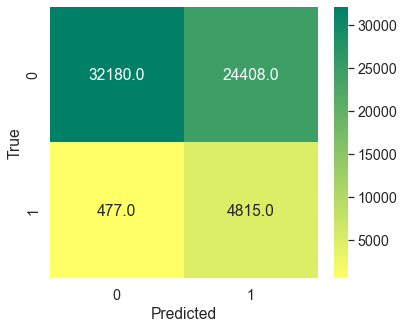

In [10]:
evaluate_model(LogisticRegression(),'summer_r')

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> 2. K-Nearest Neighbour  </b></p>
</div>. 

Training Accuracy: 0.7885682840463202
__________________________________________________
Accuracy Score:  0.6973820297349709
__________________________________________________
Precision Score:  0.18971729490022174
__________________________________________________
Recall Score:  0.7760770975056689
__________________________________________________
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     56588
           1       0.19      0.78      0.30      5292

    accuracy                           0.70     61880
   macro avg       0.58      0.73      0.56     61880
weighted avg       0.90      0.70      0.76     61880

__________________________________________________
F1 Score:  0.30489977728285084


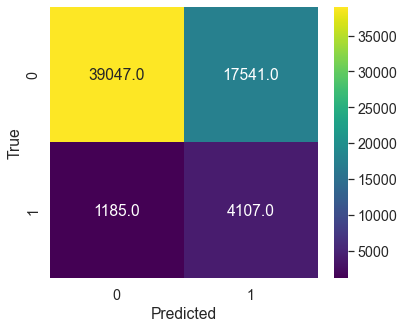

In [11]:
evaluate_model(KNeighborsClassifier(n_neighbors=8),'viridis')

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> 2. Support Vector Machine  </b></p>
</div>. 

Training Accuracy: 0.7801703512297827
__________________________________________________
Accuracy Score:  0.5943923723335488
__________________________________________________
Precision Score:  0.16391217293922014
__________________________________________________
Recall Score:  0.9126984126984127
__________________________________________________
              precision    recall  f1-score   support

           0       0.99      0.56      0.72     56588
           1       0.16      0.91      0.28      5292

    accuracy                           0.59     61880
   macro avg       0.57      0.74      0.50     61880
weighted avg       0.92      0.59      0.68     61880

__________________________________________________
F1 Score:  0.2779136338789953


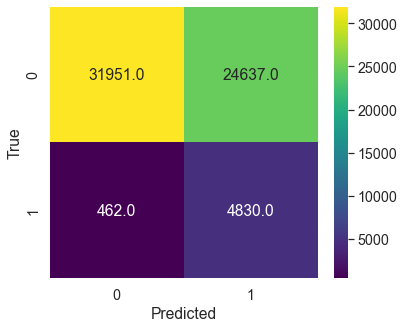

In [12]:
evaluate_model(SVC(),'viridis')

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> 3. Naive Bayes  </b></p>
</div>. 

Training Accuracy: 0.7209541582926596
__________________________________________________
Accuracy Score:  0.6922268907563025
__________________________________________________
Precision Score:  0.18186444598658338
__________________________________________________
Recall Score:  0.7428193499622071
__________________________________________________
              precision    recall  f1-score   support

           0       0.97      0.69      0.80     56588
           1       0.18      0.74      0.29      5292

    accuracy                           0.69     61880
   macro avg       0.57      0.72      0.55     61880
weighted avg       0.90      0.69      0.76     61880

__________________________________________________
F1 Score:  0.2921916229977329


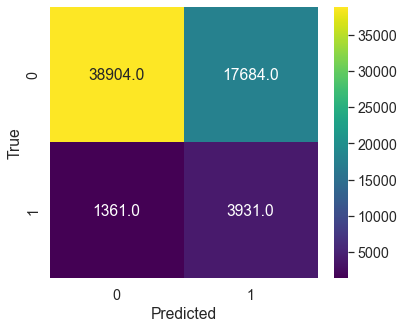

In [13]:
evaluate_model(GaussianNB(),'viridis')

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> 4. Decision Tree  </b></p>
</div>. 

Training Accuracy: 0.727366255144033
__________________________________________________
Accuracy Score:  0.6985455720749838
__________________________________________________
Precision Score:  0.18282377516141285
__________________________________________________
Recall Score:  0.7277021919879063
__________________________________________________
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     56588
           1       0.18      0.73      0.29      5292

    accuracy                           0.70     61880
   macro avg       0.57      0.71      0.55     61880
weighted avg       0.90      0.70      0.76     61880

__________________________________________________
F1 Score:  0.2922294733646988


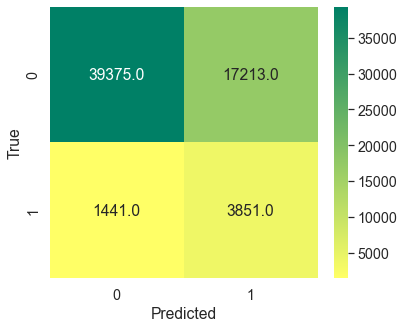

In [14]:
evaluate_model(DecisionTreeClassifier(max_depth=8,max_features=4,min_samples_split=5,min_samples_leaf=3),'summer_r')

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> 5. Random Forest  </b></p>
</div>. 

Training Accuracy: 0.7808881232653843
__________________________________________________
Accuracy Score:  0.6807207498383969
__________________________________________________
Precision Score:  0.1902967498822421
__________________________________________________
Recall Score:  0.8397581254724111
__________________________________________________
              precision    recall  f1-score   support

           0       0.98      0.67      0.79     56588
           1       0.19      0.84      0.31      5292

    accuracy                           0.68     61880
   macro avg       0.58      0.75      0.55     61880
weighted avg       0.91      0.68      0.75     61880

__________________________________________________
F1 Score:  0.3102810263571304


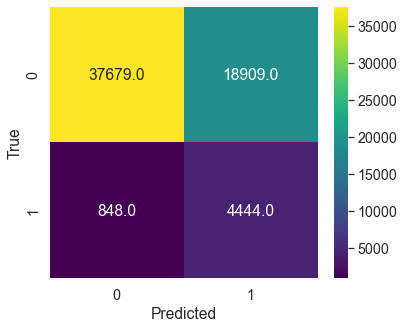

In [15]:
evaluate_model(RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       n_estimators=28, random_state=0),'viridis')

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> 6. XGboost  </b></p>
</div>. 

C:\Users\ascom\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:08:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 0.8069193224231984
__________________________________________________
Accuracy Score:  0.659486102133161
__________________________________________________
Precision Score:  0.18240006440964535
__________________________________________________
Recall Score:  0.8561980347694633
__________________________________________________
              precision    recall  f1-score   support

           0       0.98      0.64      0.77     56588
           1       0.18      0.86      0.30      5292

    accuracy                           0.66     61880
   macro avg       0.58      0.75      0.54     61880
weighted avg       0.91      0.66      0.73     61880

______________

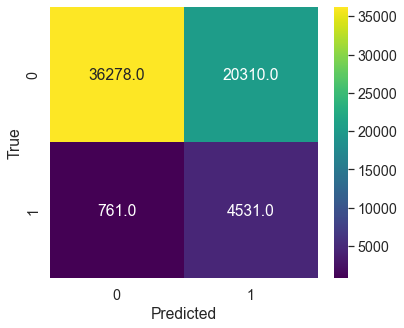

In [16]:
evaluate_model(XGBClassifier(),'viridis')